In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading dataset in pandas
df = pd.read_csv("Cipla.csv")
#Droping unwanted columns
df.drop(["Date", "Adj Close"], axis=1, inplace=True)
print("Shape ->",df.shape)
df.head()

Shape -> (6520, 5)


,Open,High,Low,Close,Volume
0,14.133333,14.133333,14.133333,14.133333,0.0
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [3]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]
df['Close_Tom'] =  df['Close']
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,14.133333,14.133333,14.133333,0.0,14.133333,14.133333
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Shifting whole dataset down by one row so we can use yesterdays data to predict todays closing price
df['Close_Tom'] =  df['Close_Tom'].shift(-1)
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,14.133333,14.133333,14.133333,0.0,14.133333,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Reordering columns
df = df[['Open', 'High', 'Low', 'Volume', 'Close', 'Close_Tom']]
df.head()

,Open,High,Low,Volume,Close,Close_Tom
0,14.133333,14.133333,14.133333,0.0,14.133333,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Filling null values using pad values, will fill next rows values to empty cells
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

Open         0
High         0
Low          0
Volume       0
Close        0
Close_Tom    0
dtype: int64

<AxesSubplot:>

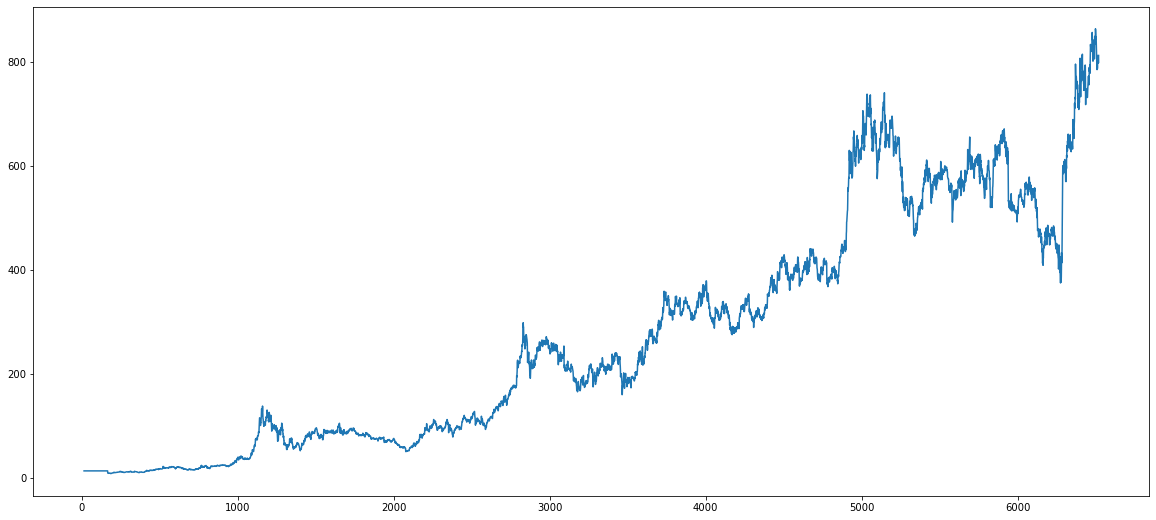

In [7]:
#Dataset Plotted
df['Close'].plot(figsize=(20,9))

In [8]:
#columns for x and y
x  = df[['Open','High','Low','Volume', 'Close']]
y = df['Close_Tom']

In [9]:
#Normalising data
scaler = MinMaxScaler()
df[['Open','High','Low','Volume', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Volume', 'Close']])
df.head()

,Open,High,Low,Volume,Close,Close_Tom
15,0.005996,0.00591,0.006158,0.0,0.006014,13.066666
16,0.005996,0.00591,0.006158,0.0,0.006014,13.066666
17,0.005996,0.00591,0.006158,0.0,0.006014,13.066666
18,0.005996,0.00591,0.006158,0.0,0.006014,13.066666
19,0.005996,0.00591,0.006158,0.0,0.006014,13.066666


In [10]:
#Splitting data
x_train , x_test , y_train , y_test = train_test_split(x ,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4860, 5)
(1620, 5)
(4860,)
(1620,)


---
# Random Forest

In [11]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 
model_rf.fit(x_train, y_train)   

RandomForestRegressor(random_state=0)

In [12]:
#predicting stock price using our model
preds_rf = model_rf.predict(x_test)

dfpred_rf = pd.DataFrame({'Actual':y_test,'Predicted':preds_rf, 'Difference':abs(y_test-preds_rf)})
dfpred_rf.head(10)

,Actual,Predicted,Difference
5085,660.000000,671.714501,11.714501
1457,85.727997,81.742266,3.985731
553,19.086666,19.723333,0.636667
4811,396.649994,399.674498,3.024504
2480,111.599998,109.952400,1.647598
5931,610.700012,622.441008,11.740996
425,13.390666,13.161382,0.229284
2877,210.350006,199.690999,10.659007
5960,515.099976,521.337505,6.237529
4908,514.299988,513.979515,0.320473


In [13]:
#Different Metrics calculated using our model
print("Score:", model_rf.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_rf))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_rf))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_rf))**0.5)
print('Loss:', abs(y_test-preds_rf).mean())

Score: 0.9990679499278112
Mean Absolute Error: 3.9520540291201267
Mean Squared  Error: 45.252719604953576
Root Mean Squared Error: 6.727014167143814
Loss: 3.9520540291201267


---
# k-NN

In [14]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=7)
model_knn.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [15]:
#predicting stock price using our model
preds_knn = model_knn.predict(x_test)

dfpred_knn = pd.DataFrame({'Actual':y_test,'Predicted':preds_knn, 'Difference':abs(y_test-preds_knn)})
dfpred_knn.head(10)

,Actual,Predicted,Difference
5085,660.000000,625.399994,34.600006
1457,85.727997,91.028000,5.300003
553,19.086666,550.450012,531.363346
4811,396.649994,194.034992,202.615002
2480,111.599998,96.841999,14.757999
5931,610.700012,567.175018,43.524994
425,13.390666,12.420000,0.970666
2877,210.350006,201.166660,9.183346
5960,515.099976,477.075012,38.024964
4908,514.299988,434.074997,80.224991


In [16]:
model_knn.get_params()

{'cv': 7,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [17]:
#Different Metrics calculated using our model
print("Score:", model_knn.score(x_test, y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_knn))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_knn))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_knn))**0.5)
print('Loss:', abs(y_test-preds_knn).mean())

Score: 0.7725516853073013
Mean Absolute Error: 67.49163936666666
Mean Squared  Error: 11043.027747679713
Root Mean Squared Error: 105.08581135281638
Loss: 67.49163936666666


---
# Decision Tree

In [18]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [19]:
#predicting stock price using our model
preds_dt = model_dt.predict(x_test)

dfpred_dt = pd.DataFrame({'Actual':y_test,'Predicted':preds_dt, 'Difference':abs(y_test-preds_dt)})
dfpred_dt.head(10)

,Actual,Predicted,Difference
5085,660.000000,658.500000,1.500000
1457,85.727997,81.564003,4.163994
553,19.086666,20.366667,1.280001
4811,396.649994,392.899994,3.750000
2480,111.599998,111.800003,0.200005
5931,610.700012,626.200012,15.500000
425,13.390666,13.390666,0.000000
2877,210.350006,201.750000,8.600006
5960,515.099976,504.100006,10.999970
4908,514.299988,513.650024,0.649964


In [20]:
#Different Metrics calculated using our model
print("Score:", model_dt.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_dt))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_dt))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_dt))**0.5)
print('Loss:', abs(y_test-preds_dt).mean())

Score: 0.9983175517591709
Mean Absolute Error: 5.3715133582304535
Mean Squared  Error: 81.68591019288546
Root Mean Squared Error: 9.038025790673839
Loss: 5.3715133582304535


---
# Linear Regression

In [21]:
#linear Regression
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [22]:
#Coefficients and Intercept of LR
print(model_lr.coef_)
print(model_lr.intercept_)

[-9.64465757e-03  2.29525890e-02  1.21268308e-01  1.06188826e-07
  8.66333737e-01]
0.09924827903438427


In [23]:
#predicting stock price using our model
preds_lr = model_lr.predict(x_test)

dfpred_lr = pd.DataFrame({'Actual':y_test,'Predicted':preds_lr, 'Difference':abs(y_test-preds_lr)})
dfpred_lr.head(10)

,Actual,Predicted,Difference
5085,660.000000,674.085499,14.085499
1457,85.727997,81.484562,4.243435
553,19.086666,19.247153,0.160487
4811,396.649994,403.782808,7.132814
2480,111.599998,111.300074,0.299924
5931,610.700012,621.186573,10.486561
425,13.390666,13.503971,0.113305
2877,210.350006,201.591472,8.758534
5960,515.099976,517.401694,2.301718
4908,514.299988,513.242062,1.057926


In [24]:
#Different Metrics calculated using our model
print("Score:", model_lr.score(x_test,y_test))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,preds_lr))
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,preds_lr))
print('Root Mean Squared Error:',(metrics.mean_squared_error(y_test,preds_lr))**0.5)
print('Loss:', abs(y_test-preds_lr).mean())

Score: 0.9991956219368711
Mean Absolute Error: 3.4825767275192367
Mean Squared  Error: 39.05401226102083
Root Mean Squared Error: 6.249320943992301
Loss: 3.4825767275192367
